# Heart Disease Prediction

**Importing Required Libraries**

In [3]:
# Data Handling Libraries:
import pandas as pd
import numpy as np

# Data Preprocessing Libraries:
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler

# Data Visualization Libraries:
import matplotlib.pyplot as plt
import seaborn as sn
from matplotlib.cm import rainbow
from matplotlib import rcParams
%matplotlib inline

# Machine Learning Libraries:
import sklearn
from sklearn.linear_model import LogisticRegression
from sklearn.svm import SVC
from sklearn.naive_bayes import GaussianNB
from sklearn.ensemble import RandomForestClassifier
from sklearn.tree import DecisionTreeClassifier

# Model Evaluation Libraries:
from sklearn import metrics
from sklearn.metrics import confusion_matrix
from sklearn.metrics import accuracy_score
from sklearn.metrics import classification_report

# Other libraries:
import warnings
warnings.filterwarnings('ignore')

Funtion for displaying the performace metrics of models

In [5]:
def print_score(clf, X_train, y_train, X_test, y_test, train=True):
    if train:
        pred = clf.predict(X_train)
        clf_report = pd.DataFrame(classification_report(y_train, pred, output_dict=True))
        print("Train Result:\n================================================")
        print(f"Accuracy Score: {accuracy_score(y_train, pred) * 100:.2f}%")
        print("_______________________________________________")
        print(f"CLASSIFICATION REPORT:\n{clf_report}")
        print("_______________________________________________")
        print(f"Confusion Matrix: \n {confusion_matrix(y_train, pred)}\n")
        
    elif train==False:
        pred = clf.predict(X_test)
        clf_report = pd.DataFrame(classification_report(y_test, pred, output_dict=True))
        print("Test Result:\n================================================")        
        print(f"Accuracy Score: {accuracy_score(y_test, pred) * 100:.2f}%")
        print("_______________________________________________")
        print(f"CLASSIFICATION REPORT:\n{clf_report}")
        print("_______________________________________________")
        print(f"Confusion Matrix: \n {confusion_matrix(y_test, pred)}\n")

**Data Handling**

Loading the dataset into a DataFrame

In [8]:
HDP_df = pd.read_csv('HeartDisease.csv')
HDP_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 303 entries, 0 to 302
Data columns (total 14 columns):
 #   Column               Non-Null Count  Dtype  
---  ------               --------------  -----  
 0   age                  303 non-null    int64  
 1   gender               303 non-null    int64  
 2   chest_pain           303 non-null    int64  
 3   rest_bps             303 non-null    int64  
 4   cholestrol           303 non-null    int64  
 5   fasting_blood_sugar  303 non-null    int64  
 6   rest_ecg             303 non-null    int64  
 7   thalach              303 non-null    int64  
 8   exer_angina          303 non-null    int64  
 9   old_peak             303 non-null    float64
 10  slope                303 non-null    int64  
 11  ca                   303 non-null    int64  
 12  thalassemia          303 non-null    int64  
 13  target               303 non-null    int64  
dtypes: float64(1), int64(13)
memory usage: 33.3 KB


In [9]:
HDP_df.describe()

,age,gender,chest_pain,rest_bps,cholestrol,fasting_blood_sugar,rest_ecg,thalach,exer_angina,old_peak,slope,ca,thalassemia,target
count,303.000000,303.000000,303.000000,303.000000,303.000000,303.000000,303.000000,303.000000,303.000000,303.000000,303.000000,303.000000,303.000000,303.000000
mean,54.366337,0.683168,0.966997,131.623762,246.264026,0.148515,0.528053,149.646865,0.326733,1.039604,1.399340,0.729373,2.313531,0.544554
std,9.082101,0.466011,1.032052,17.538143,51.830751,0.356198,0.525860,22.905161,0.469794,1.161075,0.616226,1.022606,0.612277,0.498835
min,29.000000,0.000000,0.000000,94.000000,126.000000,0.000000,0.000000,71.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
25%,47.500000,0.000000,0.000000,120.000000,211.000000,0.000000,0.000000,133.500000,0.000000,0.000000,1.000000,0.000000,2.000000,0.000000
50%,55.000000,1.000000,1.000000,130.000000,240.000000,0.000000,1.000000,153.000000,0.000000,0.800000,1.000000,0.000000,2.000000,1.000000
75%,61.000000,1.000000,2.000000,140.000000,274.500000,0.000000,1.000000,166.000000,1.000000,1.600000,2.000000,1.000000,3.000000,1.000000
max,77.000000,1.000000,3.000000,200.000000,564.000000,1.000000,2.000000,202.000000,1.000000,6.200000,2.000000,4.000000,3.000000,1.000000


In [10]:
HDP_df.head()

,age,gender,chest_pain,rest_bps,cholestrol,fasting_blood_sugar,rest_ecg,thalach,exer_angina,old_peak,slope,ca,thalassemia,target
0,63,1,3,145,233,1,0,150,0,2.3,0,0,1,1
1,37,1,2,130,250,0,1,187,0,3.5,0,0,2,1
2,41,0,1,130,204,0,0,172,0,1.4,2,0,2,1
3,56,1,1,120,236,0,1,178,0,0.8,2,0,2,1
4,57,0,0,120,354,0,1,163,1,0.6,2,0,2,1


**Exploratory Data Analysis**

Analysing the dataset for frequency distribution of patients with or without heart disease

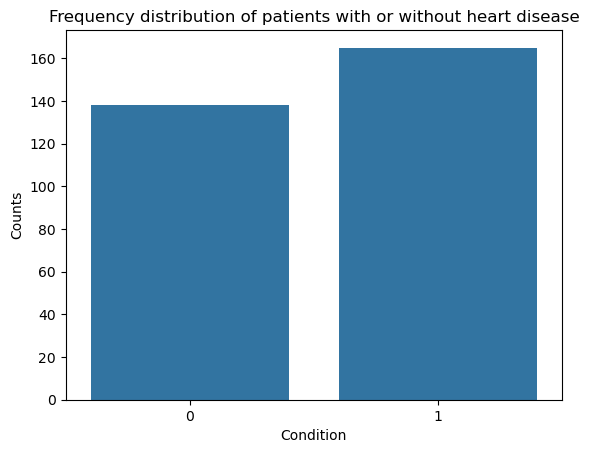

In [13]:
sn.barplot(HDP_df['target'].value_counts())
plt.xlabel('Condition')
plt.ylabel('Counts')
plt.title('Frequency distribution of patients with or without heart disease') 
plt.show()

Analysing correlations between features and target

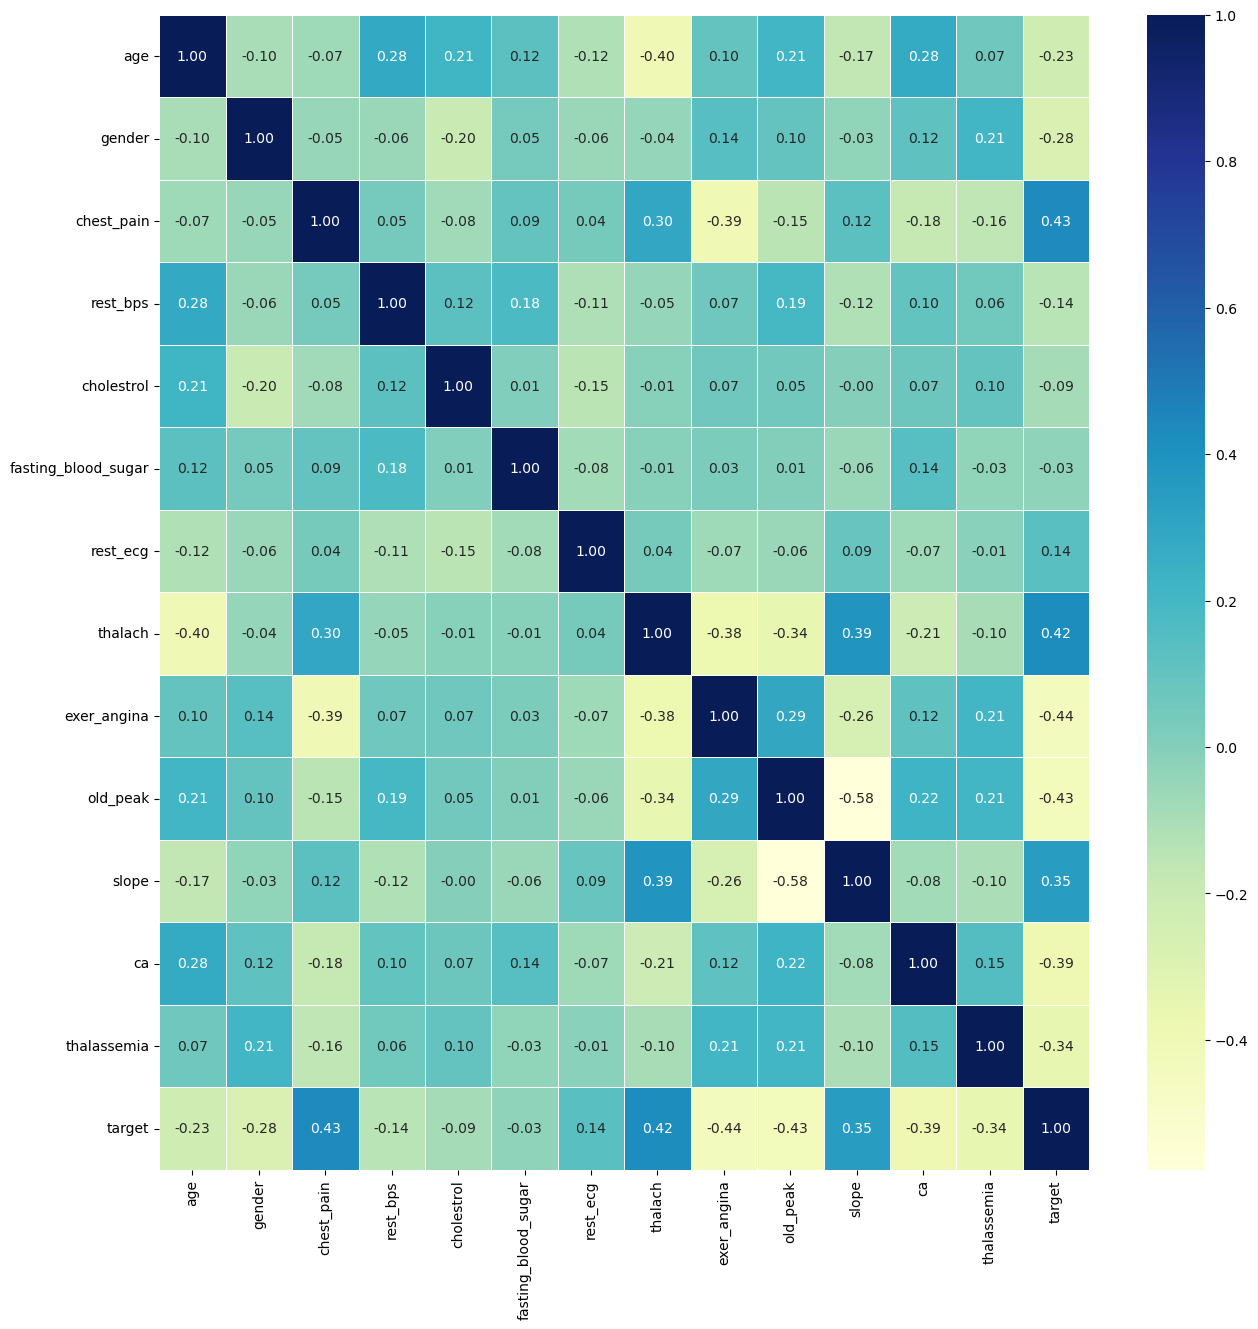

In [15]:
plt.figure(figsize = [15,15])
sn.heatmap(HDP_df.corr(), annot = True, linewidths = 0.5, fmt = ".2f", cmap = "YlGnBu");
plt.show()

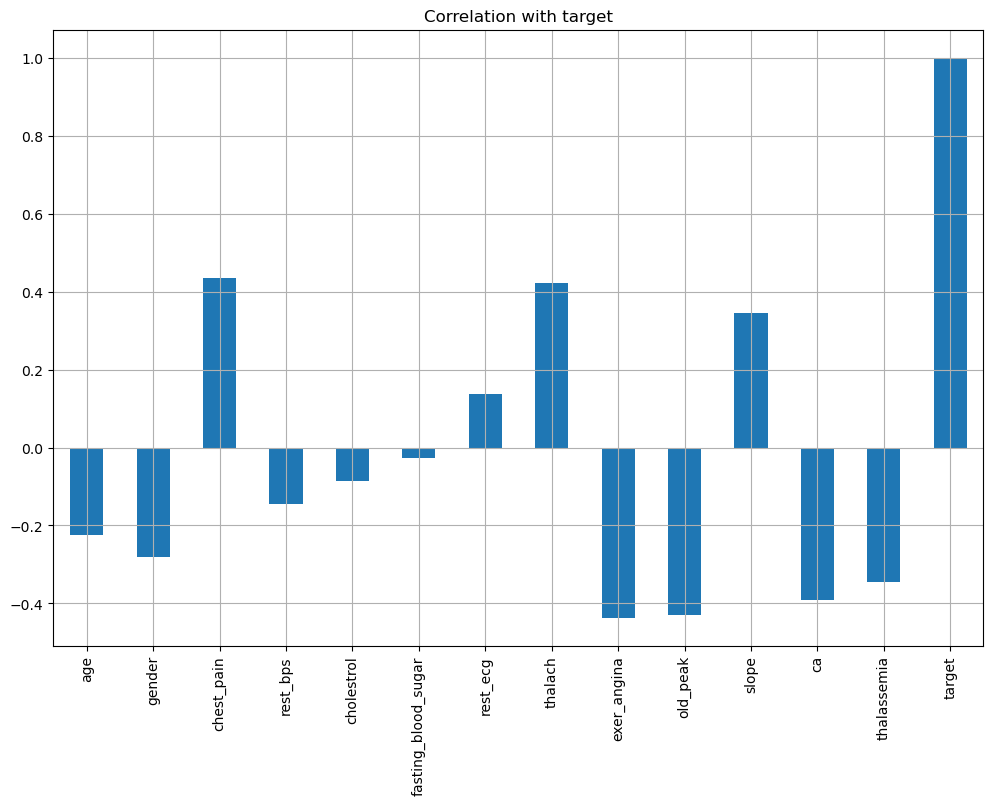

In [16]:
HDP_df.corrwith(HDP_df.target).plot(kind = 'bar', grid = True, figsize = (12, 8), title = "Correlation with target")
plt.show()

**Observations:**
- fbs and chol are the least correlated with the target variable.
- All other variables have a significant correlation with the target variable.

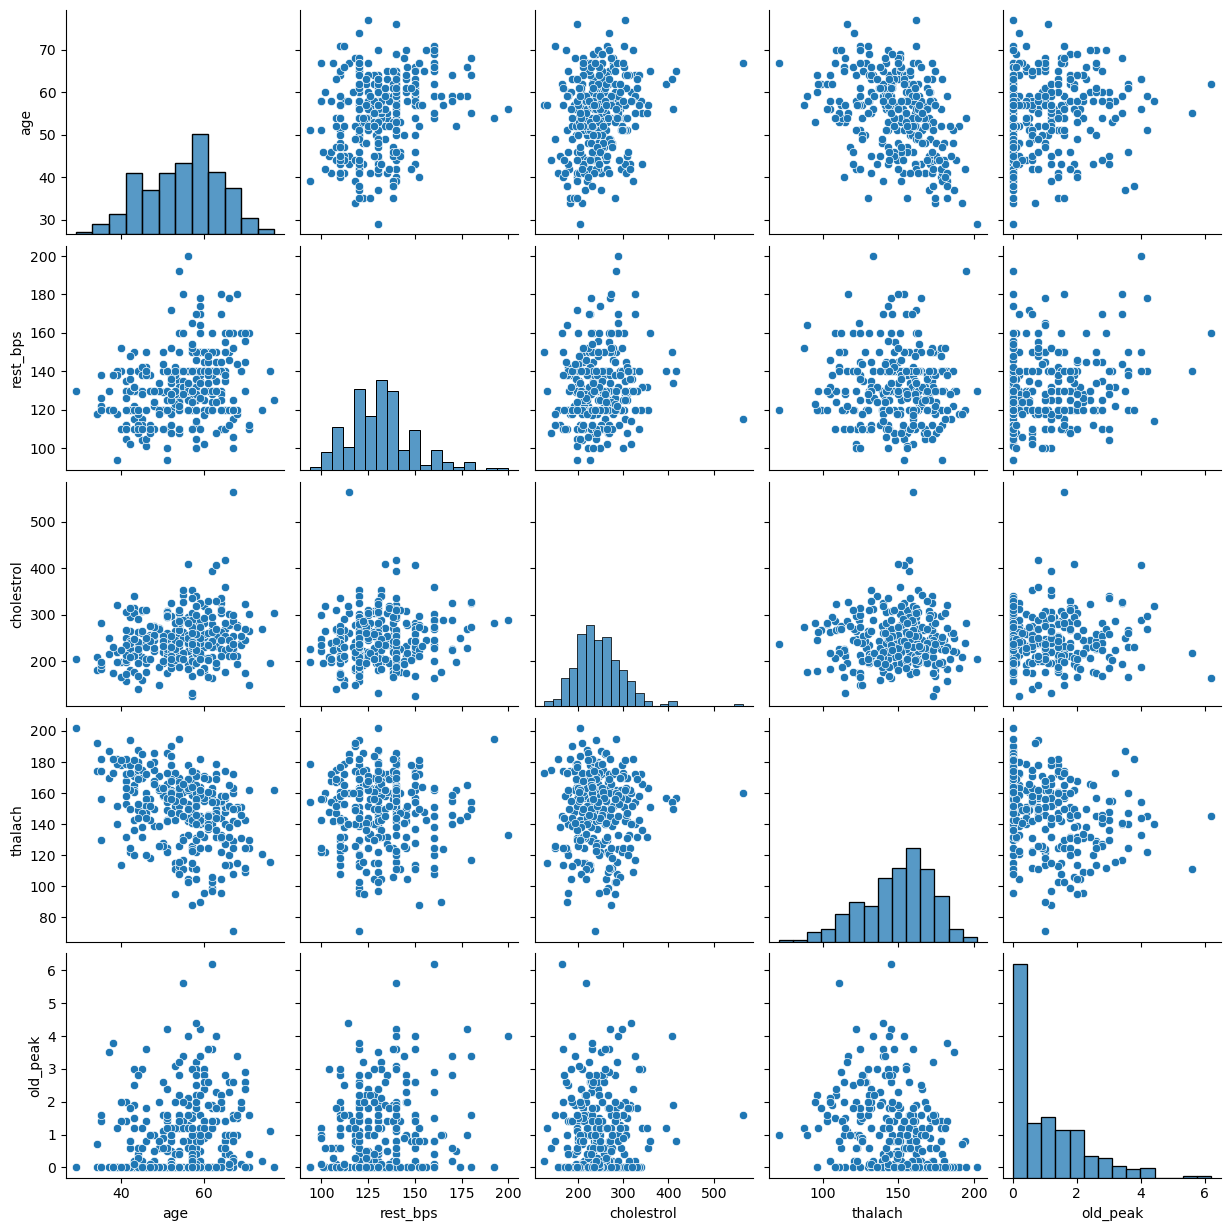

In [18]:
num_val = HDP_df[['age','rest_bps', 'cholestrol', 'thalach', 'old_peak']]
sn.pairplot(num_val)
plt.show()

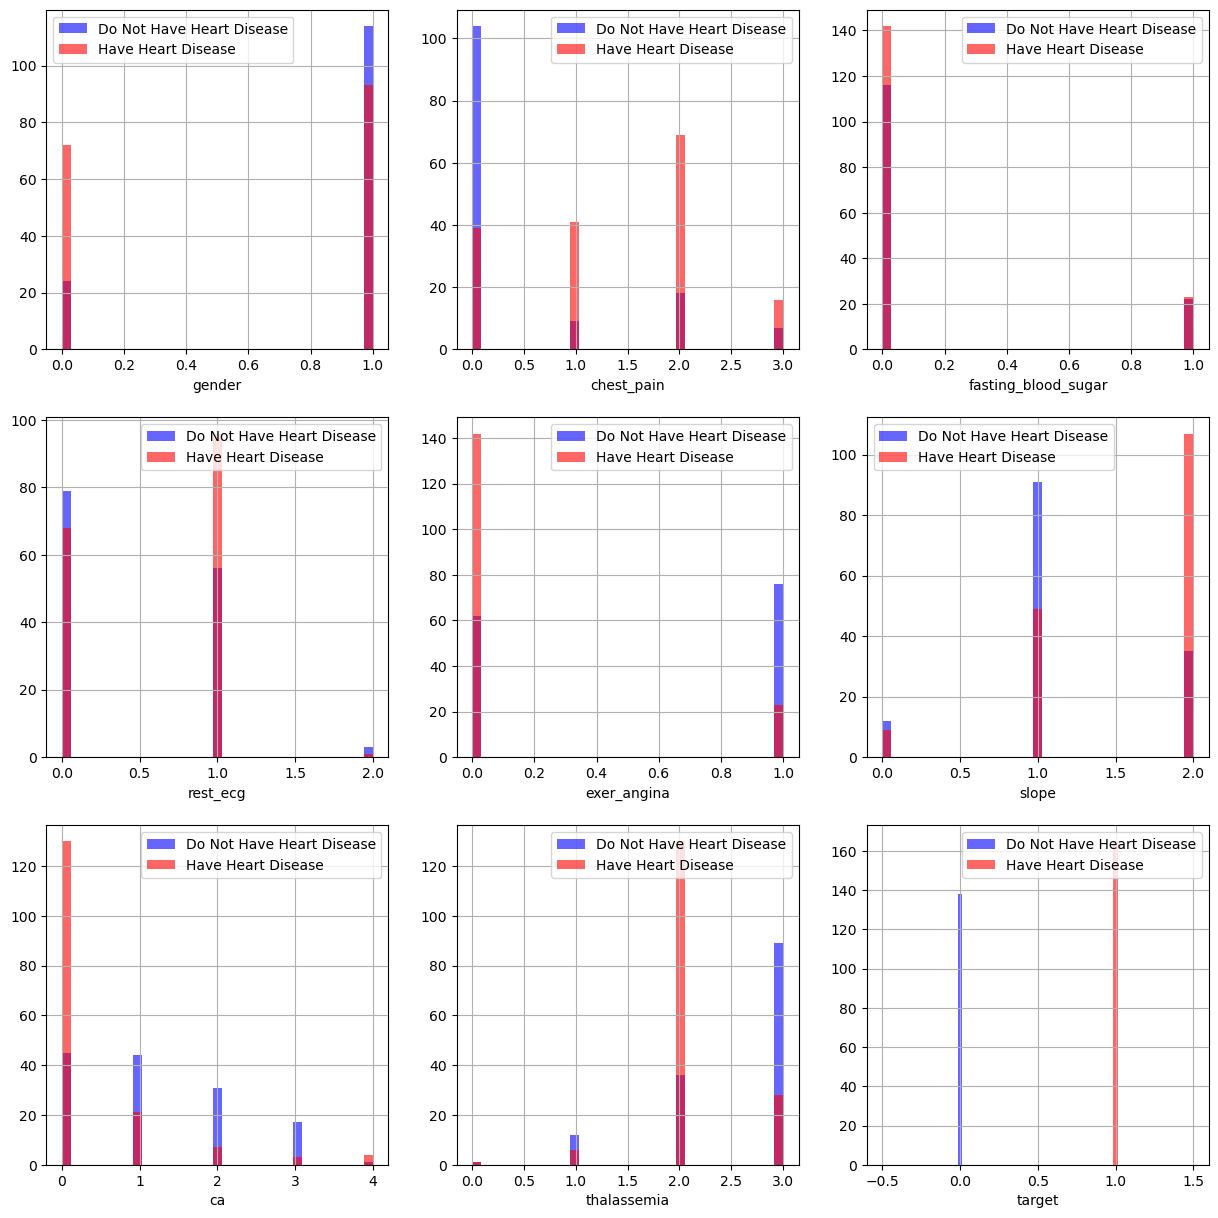

In [19]:
plt.figure(figsize=(15, 15))
feature_list = ['gender', 'chest_pain', 'fasting_blood_sugar', 'rest_ecg', 'exer_angina', 'slope', 'ca', 'thalassemia', 'target']
for i, column in enumerate(feature_list, 1):
    plt.subplot(3, 3, i)
    HDP_df[HDP_df["target"] == 0][column].hist(bins=35, color='blue', label='Do Not Have Heart Disease', alpha=0.6)
    HDP_df[HDP_df["target"] == 1][column].hist(bins=35, color='red', label='Have Heart Disease', alpha=0.6)
    plt.legend()
    plt.xlabel(column)
plt.show()

**Observations from the above plot:**
- cp {Chest pain}: People with cp 1, 2, 3 are more likely to have heart disease than people with cp 0.
- restecg {resting EKG results}: People with a value of 1 (reporting an abnormal heart rhythm, which can range from mild symptoms to severe problems) are more likely to have heart disease.
- exang {exercise-induced angina}: people with a value of 0 (No ==> angina induced by exercise) have more heart disease than people with a value of 1 (Yes ==> angina induced by exercise)
- slope {the slope of the ST segment of peak exercise}: People with a slope value of 2 (Downslopins: signs of an unhealthy heart) are more likely to have heart disease than people with a slope value of 2 slope is 0 (Upsloping: best heart rate with exercise) or 1 (Flatsloping: minimal change (typical healthy heart)).
- ca {number of major vessels (0-3) stained by fluoroscopy}: the more blood movement the better, so people with ca equal to 0 are more likely to have heart disease.
- thal {thalium stress result}: People with a thal value of 2 (defect corrected: once was a defect but ok now) are more likely to have heart disease.

**Data Preprocessing**

Checking for null values

In [23]:
HDP_df.isna().sum()

age                    0
gender                 0
chest_pain             0
rest_bps               0
cholestrol             0
fasting_blood_sugar    0
rest_ecg               0
thalach                0
exer_angina            0
old_peak               0
slope                  0
ca                     0
thalassemia            0
target                 0
dtype: int64

Identifying categorical and numerical variables:

In [25]:
categorical_val = []
continous_val = []
for column in HDP_df.columns:
    print('==============================')
    print(f"{column} : {HDP_df[column].unique()}")
    if len(HDP_df[column].unique()) <= 10:
        categorical_val.append(column)
    else:
        continous_val.append(column)

age : [63 37 41 56 57 44 52 54 48 49 64 58 50 66 43 69 59 42 61 40 71 51 65 53
 46 45 39 47 62 34 35 29 55 60 67 68 74 76 70 38 77]
gender : [1 0]
chest_pain : [3 2 1 0]
rest_bps : [145 130 120 140 172 150 110 135 160 105 125 142 155 104 138 128 108 134
 122 115 118 100 124  94 112 102 152 101 132 148 178 129 180 136 126 106
 156 170 146 117 200 165 174 192 144 123 154 114 164]
cholestrol : [233 250 204 236 354 192 294 263 199 168 239 275 266 211 283 219 340 226
 247 234 243 302 212 175 417 197 198 177 273 213 304 232 269 360 308 245
 208 264 321 325 235 257 216 256 231 141 252 201 222 260 182 303 265 309
 186 203 183 220 209 258 227 261 221 205 240 318 298 564 277 214 248 255
 207 223 288 160 394 315 246 244 270 195 196 254 126 313 262 215 193 271
 268 267 210 295 306 178 242 180 228 149 278 253 342 157 286 229 284 224
 206 167 230 335 276 353 225 330 290 172 305 188 282 185 326 274 164 307
 249 341 407 217 174 281 289 322 299 300 293 184 409 259 200 327 237 218
 319 166 311 169 187 1

In [26]:
print("Categorical variables are: ", categorical_val)
print("Continuous variables are: ", continous_val)

Categorical variables are:  ['gender', 'chest_pain', 'fasting_blood_sugar', 'rest_ecg', 'exer_angina', 'slope', 'ca', 'thalassemia', 'target']
Continuous variables are:  ['age', 'rest_bps', 'cholestrol', 'thalach', 'old_peak']


Identifying feature and target variables:

In [28]:
target_var = HDP_df['target']
ind_features = HDP_df.drop(columns = ['target'])

splitting the dataset into training and testing datasets

In [30]:
X_train, X_test, y_train, y_test = train_test_split(ind_features, target_var, test_size=0.2, random_state=42)

Encoding categorical features

In [32]:
X_train = pd.get_dummies(X_train)
X_test = pd.get_dummies(X_test)
X_train, X_test = X_train.align(X_test, join='left', axis=1, fill_value=0)

Scaling numerical features

In [34]:
sc = StandardScaler()
col_to_scale = ['age', 'rest_bps', 'cholestrol', 'thalach', 'old_peak']
X_train[col_to_scale] = sc.fit_transform(X_train[col_to_scale])
X_test[col_to_scale] = sc.transform(X_test[col_to_scale])

**Fitting the Models**

Logestic Regression

In [37]:
lr_clf = LogisticRegression(solver='liblinear')
lr_clf.fit(X_train, y_train)

LogisticRegression(solver='liblinear')

Support Vector Machine

In [39]:
svc_clf = SVC()
svc_clf.fit(X_train, y_train)

SVC()

Naive Bayes Classifier

In [41]:
GaussianNB_clf = GaussianNB()
GaussianNB_clf.fit(X_train, y_train)

GaussianNB()

Random Forest Classifier

In [43]:
rf_clf = RandomForestClassifier()
rf_clf.fit(X_train, y_train)

RandomForestClassifier()

Decision Tree Classifier

In [45]:
dt_clf = DecisionTreeClassifier()
dt_clf.fit(X_train, y_train)

DecisionTreeClassifier()

**Model Evaluation**

Logestic Regression

In [48]:
print_score(lr_clf, X_train, y_train, X_test, y_test, train=True)
print_score(lr_clf, X_train, y_train, X_test, y_test, train=False)

Train Result:
Accuracy Score: 86.36%
_______________________________________________
CLASSIFICATION REPORT:
                    0           1  accuracy   macro avg  weighted avg
precision    0.872549    0.857143  0.863636    0.864846      0.864082
recall       0.816514    0.902256  0.863636    0.859385      0.863636
f1-score     0.843602    0.879121  0.863636    0.861361      0.863123
support    109.000000  133.000000  0.863636  242.000000    242.000000
_______________________________________________
Confusion Matrix: 
 [[ 89  20]
 [ 13 120]]

Test Result:
Accuracy Score: 86.89%
_______________________________________________
CLASSIFICATION REPORT:
                   0       1  accuracy  macro avg  weighted avg
precision   0.862069   0.875  0.868852   0.868534      0.868852
recall      0.862069   0.875  0.868852   0.868534      0.868852
f1-score    0.862069   0.875  0.868852   0.868534      0.868852
support    29.000000  32.000  0.868852  61.000000     61.000000
_______________________

Support Vector Machine

In [50]:
print_score(svc_clf, X_train, y_train, X_test, y_test, train=True)
print_score(svc_clf, X_train, y_train, X_test, y_test, train=False)

Train Result:
Accuracy Score: 88.84%
_______________________________________________
CLASSIFICATION REPORT:
                    0           1  accuracy   macro avg  weighted avg
precision    0.936170    0.858108   0.88843    0.897139      0.893268
recall       0.807339    0.954887   0.88843    0.881113      0.888430
f1-score     0.866995    0.903915   0.88843    0.885455      0.887286
support    109.000000  133.000000   0.88843  242.000000    242.000000
_______________________________________________
Confusion Matrix: 
 [[ 88  21]
 [  6 127]]

Test Result:
Accuracy Score: 88.52%
_______________________________________________
CLASSIFICATION REPORT:
                   0          1  accuracy  macro avg  weighted avg
precision   0.892857   0.878788  0.885246   0.885823      0.885477
recall      0.862069   0.906250  0.885246   0.884159      0.885246
f1-score    0.877193   0.892308  0.885246   0.884750      0.885122
support    29.000000  32.000000  0.885246  61.000000     61.000000
________

Naive Bayes Classifier

In [52]:
print_score(GaussianNB_clf, X_train, y_train, X_test, y_test, train=True)
print_score(GaussianNB_clf, X_train, y_train, X_test, y_test, train=False)

Train Result:
Accuracy Score: 81.82%
_______________________________________________
CLASSIFICATION REPORT:
                    0           1  accuracy   macro avg  weighted avg
precision    0.815534    0.820144  0.818182    0.817839      0.818068
recall       0.770642    0.857143  0.818182    0.813893      0.818182
f1-score     0.792453    0.838235  0.818182    0.815344      0.817614
support    109.000000  133.000000  0.818182  242.000000    242.000000
_______________________________________________
Confusion Matrix: 
 [[ 84  25]
 [ 19 114]]

Test Result:
Accuracy Score: 86.89%
_______________________________________________
CLASSIFICATION REPORT:
                   0          1  accuracy  macro avg  weighted avg
precision   0.838710   0.900000  0.868852   0.869355      0.870862
recall      0.896552   0.843750  0.868852   0.870151      0.868852
f1-score    0.866667   0.870968  0.868852   0.868817      0.868923
support    29.000000  32.000000  0.868852  61.000000     61.000000
________

Random Forest Classifier

In [54]:
print_score(rf_clf, X_train, y_train, X_test, y_test, train=True)
print_score(rf_clf, X_train, y_train, X_test, y_test, train=False)

Train Result:
Accuracy Score: 100.00%
_______________________________________________
CLASSIFICATION REPORT:
               0      1  accuracy  macro avg  weighted avg
precision    1.0    1.0       1.0        1.0           1.0
recall       1.0    1.0       1.0        1.0           1.0
f1-score     1.0    1.0       1.0        1.0           1.0
support    109.0  133.0       1.0      242.0         242.0
_______________________________________________
Confusion Matrix: 
 [[109   0]
 [  0 133]]

Test Result:
Accuracy Score: 86.89%
_______________________________________________
CLASSIFICATION REPORT:
                   0          1  accuracy  macro avg  weighted avg
precision   0.888889   0.852941  0.868852   0.870915      0.870031
recall      0.827586   0.906250  0.868852   0.866918      0.868852
f1-score    0.857143   0.878788  0.868852   0.867965      0.868498
support    29.000000  32.000000  0.868852  61.000000     61.000000
_______________________________________________
Confusion Matr

Decision Tree Classifier

In [56]:
print_score(dt_clf, X_train, y_train, X_test, y_test, train=True)
print_score(dt_clf, X_train, y_train, X_test, y_test, train=False)

Train Result:
Accuracy Score: 100.00%
_______________________________________________
CLASSIFICATION REPORT:
               0      1  accuracy  macro avg  weighted avg
precision    1.0    1.0       1.0        1.0           1.0
recall       1.0    1.0       1.0        1.0           1.0
f1-score     1.0    1.0       1.0        1.0           1.0
support    109.0  133.0       1.0      242.0         242.0
_______________________________________________
Confusion Matrix: 
 [[109   0]
 [  0 133]]

Test Result:
Accuracy Score: 81.97%
_______________________________________________
CLASSIFICATION REPORT:
                   0          1  accuracy  macro avg  weighted avg
precision   0.781250   0.862069  0.819672   0.821659      0.823647
recall      0.862069   0.781250  0.819672   0.821659      0.819672
f1-score    0.819672   0.819672  0.819672   0.819672      0.819672
support    29.000000  32.000000  0.819672  61.000000     61.000000
_______________________________________________
Confusion Matr

**Testing**

In [58]:
new = X_train.iloc[150]
a = np.asarray(new)
a = a.reshape(1,-1)
p = GaussianNB_clf.predict(a)

In [59]:
p[0]

0

In [60]:
if (p[0] == 1):
    print("Person has heart disease")
else:
    print("Great! the results are normal")

Great! the results are normal
